# DATA VISUALIZATION WITH PYTHON PART 2

In [1]:
# import all libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating a shortcut to access the Instacart Basket data as path

path= r'C:\Users\carol\Documents\20.06 Instacart Basket Analysis'

In [3]:
# importing latest version of ords_prods_grouped

ords_prods_grouped = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_grouped.pkl'))

In [4]:
# importing data merge with customers

ords_prods_cust_grouped = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_agg.pkl'))

# QUESTION 2. CREATE BAR CHART; HISTOGRAM; SCATTERPLOT; LINE CHART USING SUBSET FOR THE LINE CHART

**NOTE** completed as part of exercise 4.9

# QUESTION 3. CREATE A HISTOGRAM OF THE ORDER_DOW

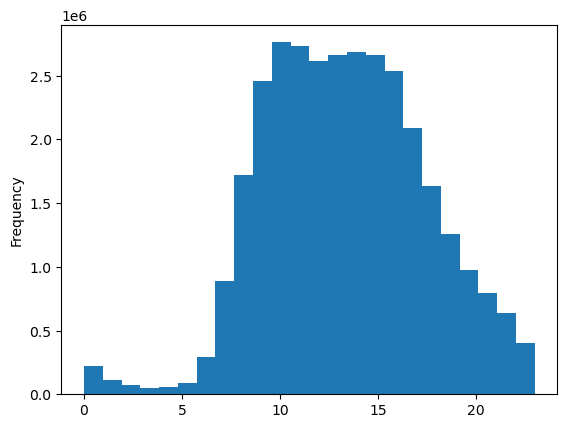

In [5]:
#Creating histogram on column hour_of_day

hist=ords_prods_cust_grouped['order_hour_of_day'].plot.hist(bins=24)

**NOTE**: y-axis represent the frequency and x-axis the 24 hours of the day. the histogram appears to be left-skewed, with higher frequency between 10 am to 16pm. After that the usage decreases at a low pace. With barely any usage between 12am to 5am. It seems instacart users prefer teh purchase in the morning and afternoon.

In [6]:
#Checking the info of the entire df 

ords_prods_cust_grouped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   Unnamed: 0                  int64   
 1   product_id                  int64   
 2   product_name                object  
 3   aisle_id                    int64   
 4   department_id               int64   
 5   prices                      float64 
 6   order_id                    int64   
 7   user_id                     int64   
 8   order_number                int64   
 9   order_dow                   int64   
 10  order_hour_of_day           int64   
 11  days_since_prior_order      float64 
 12  add_to_cart_order           int64   
 13  reordered                   int64   
 14  max_order                   int64   
 15  loyalty_flag                object  
 16  mean_product_price          float64 
 17  spending_flag               object  
 18  median_days_between_orders  float64 
 19

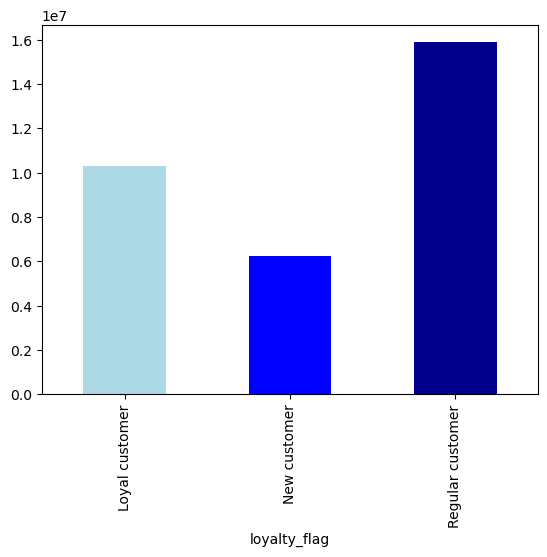

In [7]:
#Creating bar chart on the loyalty_flag

bar = ords_prods_cust_grouped['loyalty_flag'].value_counts().sort_index().plot.bar(color=['lightblue','blue','darkblue'])

**NOTE**: The most frequent customer is teh regular one( completing between 10 to 40 orders), followed by the loyal customer with over 40 orders. Assigning colours to the different categories ( establishing the darkest to the most relevant)

# QUESTION 5. CHECK EXPENDITURE DIFFERENCES

In [8]:
# Create a random sample 

np.random.seed(4)

In [9]:
#Create a list holding True/False values to the rest np.random.rand() <=0.7

dev= np.random.rand(len(ords_prods_cust_grouped))<=0.7

In [10]:
# Store 70% of the sample in the dataframe big

big = ords_prods_cust_grouped[dev]

In [11]:
# Store 30% of the sample in the dataframe big

small= ords_prods_cust_grouped [~dev]

In [12]:
# Checking sampling results

len(ords_prods_grouped)

32404859

In [13]:
len(big)+len(small)

32404859

In [14]:
#create a DF for the subset that contains data from prices and order_hours_of_day

df_2= small[['prices','order_hour_of_day']]

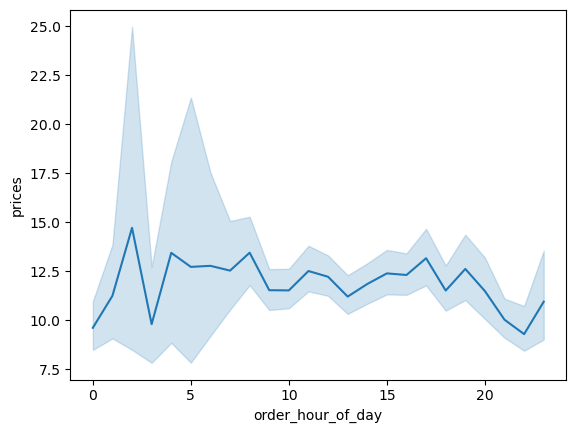

In [15]:
#Creating a line chart x-axis 'order_hour_of-day' and y-axis 'prices' ( reducing sample)

line = sns.lineplot(data=df_2,x='order_hour_of_day',y='prices')

# QUESTION 6. CONDUCT EXPLORATORY ANALYSIS ON CS DEMOGRAPHICS

In [16]:
# Exploring connection between age and Family situation( marital_ status and or n/dependant)

df_3= small[['age','marital_status']]

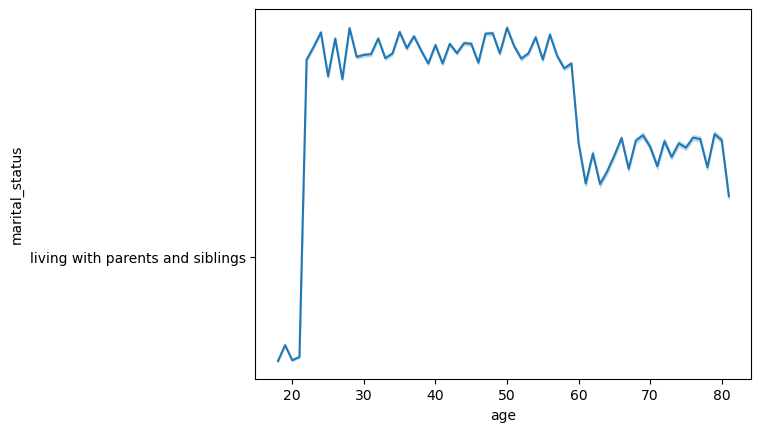

In [17]:
#Creating a line chart x-axis 'age' and y-axis 'marital_status' ( reducing sample)

line = sns.lineplot(data=df_3,x='age',y='marital_status')


In [18]:
# Exploring connection between n_dependants and Family situation( marital_ status and or n/dependant)

df_4= small[['n_dependants','marital_status']]

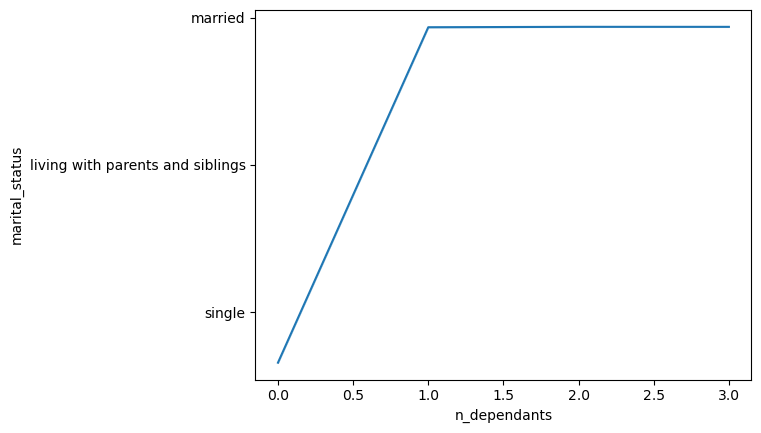

In [19]:
#Creating a line chart x-axis 'n_dependants' and y-axis 'marital_status' ( reducing sample)

line = sns.lineplot(data=df_4,x='n_dependants',y='marital_status')

**NOTE**: The line chart 'age','marital_status'shows an age range between 15-80. from early 20s to 60 customers lieving with parents or siblings is rather stable. After 60 it decreases and remains stable until people in their 80s. While the chart 'n_dependant''marital_status'shows that people with no kids remain single, whereas people with 1 dependant person are more likely to get married.

# QUESTION 7. EXPLORING AGE AND SPENDING POWER. CREATE A SCATTERPLOT

In [20]:
df_5 = small[['age','income']]

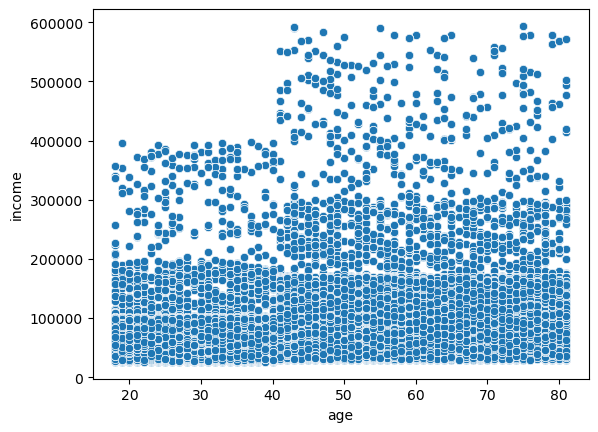

In [21]:
scatterplot= sns.scatterplot(x='age',y='income',data=df_5)

**NOTE**: the age range is between 15 to 80. the income between 0 to 600K. The data distribution gets more concentrated at the lower income levels. Customers over 40 have income concentration at teh range between 200K-300K. Customers over 40 years old are the ones presenting incomes on ranges up to 600K.

# QUESTION 8. EXPORT VISUALIZATIONS

In [22]:
#Export histogram hour_of_day

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [23]:
#Export bar chart  loyalty flag

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [24]:
# Export line  chart 'order_hour_of_day',y='prices')

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_over_hours_of_day.png'))

In [25]:
# Export line  chart x='age',y='marital_status')

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_over_marital.png'))

In [26]:
# Export line  chart x='n_dependants',y='marital_status')

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_over_marital.png'))

In [27]:
# Export scatterplot (x='age',y='income')

scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))

# EXPORT AS PICKLE

In [28]:
#Export ords_prods_cust_agg as pickle

ords_prods_cust_grouped.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_agg_2.pkl'))